# Healthcare Data example - Find the price distribution for EKGs in the South
## Create your own fictional data 

In [22]:
import pandas as pd
import numpy as np

# Seed for reproducibility
np.random.seed(0)

# Generate dummy data
company_names = [f"Company_{i}" for i in range(1, 101)]
regions = ["Northeast", "Midwest", "South", "West"]
medical_procedures = ["MRI", "CT Scan", "X-ray", "Ultrasound", "Blood Test", "EKG", "Physical Therapy", "Vaccination", "Colonoscopy", "Mammography"]

data = {
    "Company Name": np.random.choice(company_names, 10000),
    "Region": np.random.choice(regions, 10000),
    "Medical Procedure": np.random.choice(medical_procedures, 10000),
    "Price": np.random.uniform(100, 10000, 10000).round(2)
}

df = pd.DataFrame(data)

df.head()

,Company Name,Region,Medical Procedure,Price
0,Company_45,West,MRI,6022.34
1,Company_48,West,Vaccination,5747.40
2,Company_65,South,EKG,6821.80
3,Company_68,Northeast,X-ray,8016.62
4,Company_68,Midwest,MRI,307.21


## Look for the region and Medical Procedure

In [23]:
# region and pricing
df_final = df[(df['Region']=='South')& (df['Medical Procedure'] == 'EKG')]
df_final

,Company Name,Region,Medical Procedure,Price
2,Company_65,South,EKG,6821.80
49,Company_36,South,EKG,2522.43
106,Company_70,South,EKG,5570.05
143,Company_37,South,EKG,8396.67
158,Company_57,South,EKG,642.54
...,...,...,...,...
9857,Company_55,South,EKG,3728.07
9898,Company_97,South,EKG,5262.83
9901,Company_74,South,EKG,5948.76
9915,Company_62,South,EKG,6652.41


In [24]:
# region and pricing
df_filtered = df[(df['Region'] == 'West') & (df['Medical Procedure'] == 'EKG')]
df_filtered 

,Company Name,Region,Medical Procedure,Price
11,Company_89,West,EKG,3398.10
127,Company_99,West,EKG,5229.25
132,Company_83,West,EKG,9016.49
139,Company_15,West,EKG,8487.62
202,Company_72,West,EKG,1399.09
...,...,...,...,...
9826,Company_2,West,EKG,3375.04
9859,Company_57,West,EKG,6856.30
9892,Company_94,West,EKG,4849.52
9943,Company_8,West,EKG,337.98


# Use Z-score distribution to find the Z-distribution of EKG pricing in the West

In [25]:
# Calculate the mean and standard deviation of the prices
mean_price = df_filtered['Price'].mean()
std_dev_price = df_filtered['Price'].std()

# Calculate the Z-scores for each price
df_filtered['Z-Score'] = (df_filtered['Price'] - mean_price) / std_dev_price

# Display the DataFrame with the Z-scores
print(df_filtered)


     Company Name Region Medical Procedure    Price   Z-Score
11     Company_89   West               EKG  3398.10 -0.561585
127    Company_99   West               EKG  5229.25  0.070978
132    Company_83   West               EKG  9016.49  1.379263
139    Company_15   West               EKG  8487.62  1.196568
202    Company_72   West               EKG  1399.09 -1.252134
...           ...    ...               ...      ...       ...
9826    Company_2   West               EKG  3375.04 -0.569551
9859   Company_57   West               EKG  6856.30  0.633035
9892   Company_94   West               EKG  4849.52 -0.060198
9943    Company_8   West               EKG   337.98 -1.618690
9963   Company_42   West               EKG  6062.59  0.358852

[255 rows x 5 columns]


/var/folders/33/lzsfk3nd2wz5wm22rmh0kzv00000gn/T/ipykernel_53464/3817199150.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Z-Score'] = (df_filtered['Price'] - mean_price) / std_dev_price


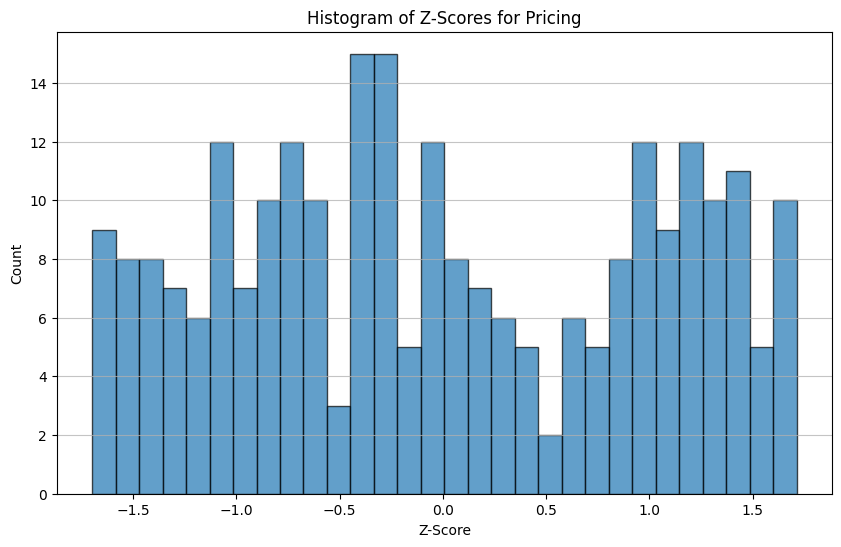

In [21]:
import matplotlib.pyplot as plt

# Assuming 'Z-Score' is a column in your DataFrame `df_filtered`
plt.figure(figsize=(10, 6))
plt.hist(df_filtered['Z-Score'], bins=30, edgecolor='black', alpha=0.7)
plt.title('Histogram of Z-Scores for Pricing')
plt.xlabel('Z-Score')
plt.ylabel('Count')
plt.grid(axis='y', alpha=0.75)
plt.show()


# Determine the outlier to be within -1.5 and 1.5 find which companies are charging the most

In [6]:
# Calculate the Z-scores for each price
df_filtered['Z-Score'] = (df_filtered['Price'] - mean_price) / std_dev_price

# Filter companies with Z-Score above 1.5
companies_above_1_5_z = df_filtered[df_filtered['Z-Score'] > 1.5]['Company Name']

companies_above_1_5_z

412      Company_60
1104     Company_60
1259      Company_4
1398     Company_30
1693     Company_57
2325     Company_63
2545     Company_77
4255     Company_57
4441    Company_100
6606     Company_88
7608     Company_98
8004     Company_77
8512     Company_29
9454     Company_96
9695     Company_95
Name: Company Name, dtype: object